In [11]:
import pandas as pd
from ollama import chat
from ollama import ChatResponse
from tqdm import tqdm

In [12]:
df = pd.read_csv('../Datasets/test_set-ANT.csv')
X = df['Neutralized SMILES']
y = df['ATC Codes']

In [13]:
if "predicted_atc4" not in df.columns:
    df["predicted_atc4"] = None
import asyncio
from ollama import AsyncClient

async def chat(message):
    response = await AsyncClient().chat(model='atc4-predictor3', messages=message)
    return response['message']['content']

for i in range(len(df)):
    smiles = df.at[i, "Neutralized SMILES"]
    s_smiles = smiles.replace("\\", "\\\\")
    message=[
        {"role": "user", "content": s_smiles}
    ]
    try:
      pred = await chat(message)
    except ollama.ResponseError as e:
      print('Error:', e.error)
      if e.status_code == 404:
        ollama.pull(model)
    df.at[i, "predicted_atc4"] = pred

    if i % 10 == 0:
        print("Guardado parcial")

df.to_csv("predicted_atc4_datasettestoriginal.csv", index=False)

Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parci

In [14]:
preds = pd.read_csv('predicted_atc4_datasettestoriginal.csv')
preds = preds['predicted_atc4']

In [15]:
preds

0       A07AA07
1        J/01AA
2       A07AA07
3         J/013
4      J/01/036
         ...   
714     N06AX02
715       J15AA
716     A07BA07
717     J01AA03
718     A09AA09
Name: predicted_atc4, Length: 719, dtype: object

In [16]:
# Convert a string that simulates a list to a real list
def convert_string_list(element):
    # Delete [] of the string
    element = element[0:len(element)]
    # Create a list that contains each code as e.g. 'A'
    ATC_list = list(element.split('; '))
    for index, code in enumerate(ATC_list):
        # Delete '' of the code
        ATC_list[index] = code[0:len(code)]
    return ATC_list

In [17]:
clear_preds = []
for i, pred in enumerate(preds):
    level4_pred = pred[0:5]
    if len(level4_pred) == 5:
        if level4_pred[0].isalpha():
            if level4_pred[1:3].isnumeric():
                if level4_pred[3].isalpha():
                    if level4_pred[4].isalpha():
                        clear_preds.append(level4_pred)
                    else:
                        clear_preds.append("Invalid prediction")
                else:
                    clear_preds.append("Invalid prediction")
            else:
                clear_preds.append("Invalid prediction")    
        else:
            clear_preds.append("Invalid prediction")
    else:
        clear_preds.append("Invalid prediction")
clear_preds

['A07AA',
 'Invalid prediction',
 'A07AA',
 'Invalid prediction',
 'Invalid prediction',
 'J06AA',
 'Invalid prediction',
 'A41AA',
 'J15AA',
 'J01AA',
 'D06AA',
 'J05BA',
 'J01AA',
 'A07BA',
 'J01AA',
 'A07AA',
 'M01AA',
 'J01AA',
 'E17AA',
 'Invalid prediction',
 'A07AA',
 'J06AA',
 'M01AA',
 'A07BA',
 'A07AA',
 'J01AA',
 'A07AA',
 'Invalid prediction',
 'A07AA',
 'A07BA',
 'Invalid prediction',
 'A07AA',
 'Invalid prediction',
 'A07BA',
 'Invalid prediction',
 'J15AA',
 'Invalid prediction',
 'A07AA',
 'J11AA',
 'M01AA',
 'J01AA',
 'A07BA',
 'J15AA',
 'A07BA',
 'A07AA',
 'J01AA',
 'A07AA',
 'Invalid prediction',
 'A01EA',
 'A07AA',
 'Invalid prediction',
 'A01AA',
 'A07AA',
 'Invalid prediction',
 'A02AA',
 'A09AA',
 'A07AA',
 'A07BA',
 'A07AA',
 'M01AA',
 'Invalid prediction',
 'A09AA',
 'M05AB',
 'A07AA',
 'A01AA',
 'A07AA',
 'A07AA',
 'J05BA',
 'J05AA',
 'J01AA',
 'A07BC',
 'D06AA',
 'A07BC',
 'A01AA',
 'A01AA',
 'M01AA',
 'A07BA',
 'M01AA',
 'A07BC',
 'D07AA',
 'A07AA',
 'J05BA'

In [18]:
print(clear_preds.count("Invalid prediction"))
print(len(clear_preds)-clear_preds.count("Invalid prediction"))

102
617


In [19]:
import matplotlib.pyplot as plt
from collections import defaultdict
# Create a dictionary of integers
counter = defaultdict(int)

for pred in clear_preds:
    # ATC_level1_list = convert_string_list(row['ATC_level1'])
    if pred != "Invalid prediction":
        counter[pred] += 1
counter

defaultdict(int,
            {'A07AA': 134,
             'J06AA': 3,
             'A41AA': 1,
             'J15AA': 24,
             'J01AA': 62,
             'D06AA': 12,
             'J05BA': 24,
             'A07BA': 110,
             'M01AA': 57,
             'E17AA': 5,
             'J11AA': 2,
             'A01EA': 7,
             'A01AA': 42,
             'A02AA': 11,
             'A09AA': 11,
             'M05AB': 5,
             'J05AA': 21,
             'A07BC': 22,
             'D07AA': 1,
             'J04AA': 2,
             'N07CA': 1,
             'J16AQ': 2,
             'M01AB': 3,
             'M05AA': 18,
             'N06AA': 3,
             'J16AA': 5,
             'D07XA': 1,
             'U01AA': 2,
             'J17AA': 4,
             'H01AA': 1,
             'E19AA': 1,
             'J97AA': 1,
             'M02AA': 2,
             'E04DC': 1,
             'N03AA': 2,
             'U03CA': 1,
             'J04AX': 1,
             'A02AD': 1,
             'A07E

In [20]:
len(counter)

46

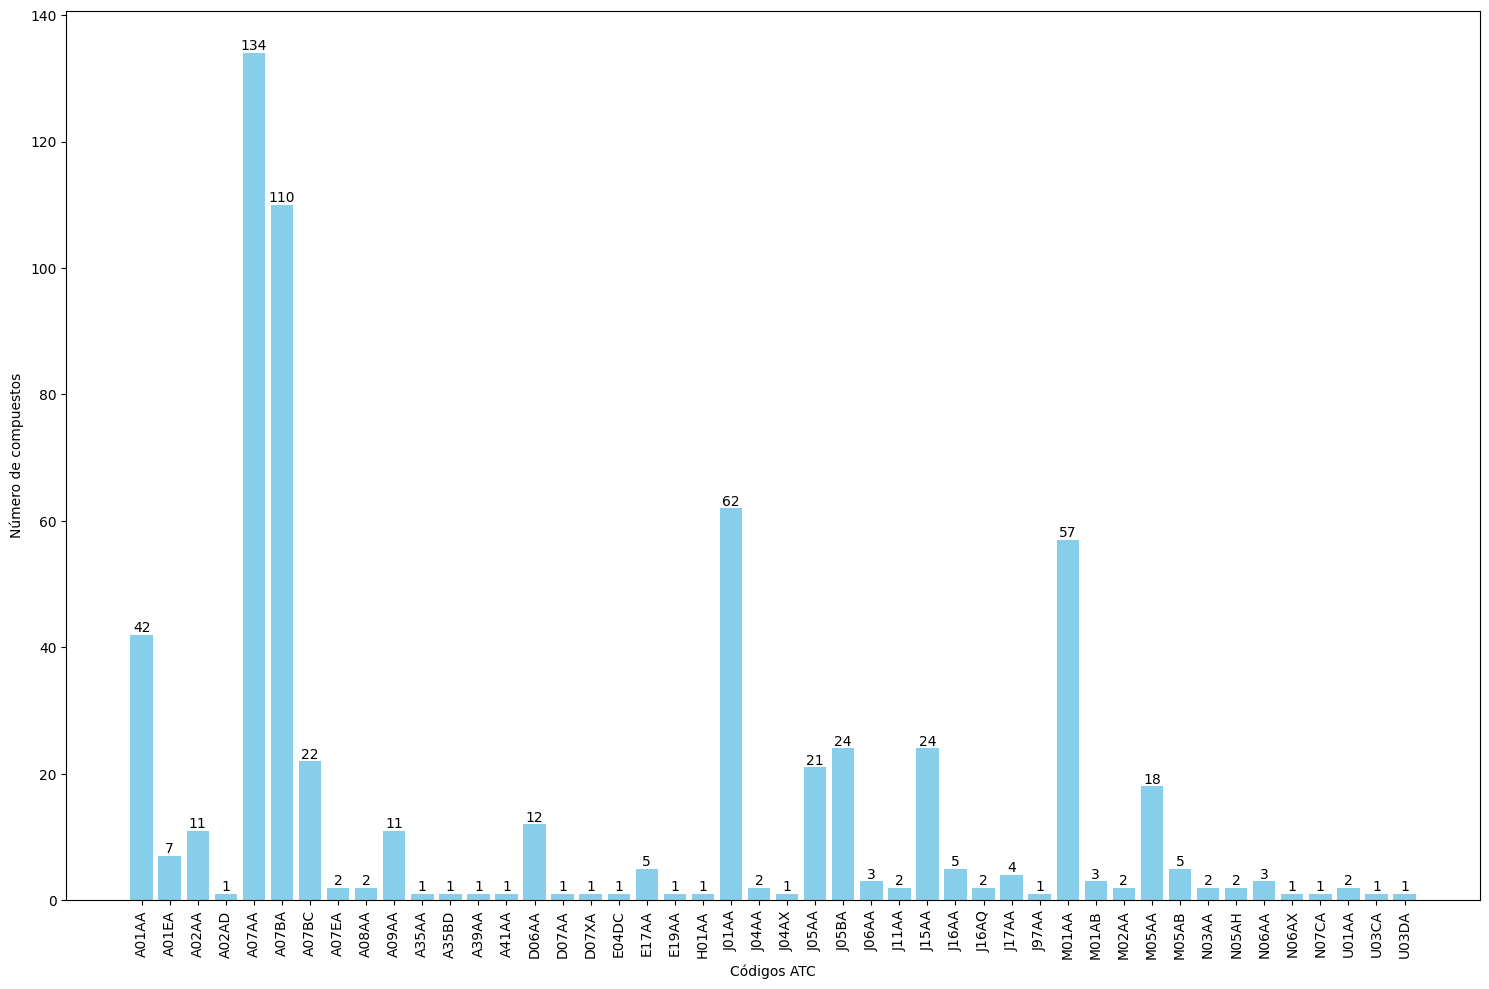

In [21]:
dict_level1 = dict(sorted(counter.items()))

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

for code, num in dict_level1.items():
    p = ax.bar(code, num, color='skyblue')
    ax.bar_label(p)
    
plt.xlabel('Códigos ATC')
plt.ylabel('Número de compuestos')
plt.xticks(rotation=90)
plt.tight_layout()

In [30]:
df_test = df
# valid_indices = [i for i, pred in enumerate(clear_preds) if pred != "Invalid prediction"]

# clear_preds = [clear_preds[i] for i in valid_indices]
# df_test = df_test.iloc[valid_indices].reset_index(drop=True)

In [31]:
df_test

,Neutralized SMILES,ATC Codes,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpMAD_A,...,SRW03,SRW05,SRW07,SRW09,ATC_level1,ATC_level2,ATC_level3,ATC_level4,multiple_ATC,predicted_atc4
0,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,A01AB; D10AF; J01AA,26.067060,21.457796,0,1,40.137325,2.651875,5.303750,1.216283,...,0.0,0.000000,0.000000,0.000000,"['J', 'A', 'D']","['D10', 'A01', 'J01']","['A01A', 'J01A', 'D10A']","['D10AF', 'J01AA', 'A01AB']",True,A07AA07
1,Cn1c(=O)c2c(ncn2CCNCC(O)c2ccc(O)c(O)c2)n(C)c1=O,C01CA,20.907864,17.027531,0,1,34.502355,2.514216,4.947627,1.277865,...,0.0,2.397895,4.727388,6.861711,['C'],['C01'],['C01C'],['C01CA'],False,J/01AA
2,CC(C)=CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,M01AX; M02AA,18.539255,15.705028,0,0,31.004484,2.530576,4.891268,1.291854,...,0.0,2.397895,4.948760,7.208600,['M'],"['M02', 'M01']","['M02A', 'M01A']","['M01AX', 'M02AA']",True,A07AA07
3,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,N05AB,23.587910,17.129344,0,2,38.805135,2.501762,5.003525,1.293504,...,0.0,0.000000,0.000000,0.000000,['N'],['N05'],['N05A'],['N05AB'],False,J/013
4,COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)C...,A03FA,24.317429,18.240404,0,1,41.041522,2.398415,4.796831,1.282548,...,0.0,0.000000,0.000000,0.000000,['A'],['A03'],['A03F'],['A03FA'],False,J/01/036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN(C)C)c2c1,G01AE; N02CC,15.304979,13.342089,0,1,24.479286,2.433993,4.773135,1.223964,...,0.0,2.397895,4.727388,6.823286,"['G', 'N']","['G01', 'N02']","['G01A', 'N02C']","['G01AE', 'N02CC']",True,N06AX02
715,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(N)...,J01DC; J01RA; S01AA,22.212688,18.808559,1,0,36.417076,2.574286,5.148124,1.255761,...,0.0,2.397895,4.442651,6.293419,"['J', 'S']","['S01', 'J01']","['J01D', 'S01A', 'J01R']","['J01RA', 'J01DC', 'S01AA']",True,J15AA
716,CCCCc1oc2ccc(NS(C)(=O)=O)cc2c1C(=O)c1ccc(OCCCN...,C01BD,29.375323,21.933108,0,1,48.942693,2.510979,4.898097,1.254941,...,0.0,2.397895,4.844187,7.050123,['C'],['C01'],['C01B'],['C01BD'],False,A07BA07
717,CN/C(=N/C#N)NCCSCc1nc[nH]c1C,A02BA,12.089765,11.136291,0,3,21.154703,2.257483,4.368546,1.244394,...,0.0,2.397895,4.595120,6.529419,['A'],['A02'],['A02B'],['A02BA'],False,J01AA03


In [32]:
# for i, pred in enumerate(clear_preds):
#     if pred == "Invalid prediction":
#         print(pred)

In [33]:
len(clear_preds)

719

In [34]:
def precision(output_beam2, df_test):
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level

    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_preds = [len(list_preds)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare predicted codes with true codes
        match_found = [False, False, False, False]
        p = list_preds
        for true_code in true_codes:
            # Compare each level
            if len(p) == 5:
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it converts to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                     if level+1 < 4:
                        num_preds[level+1] -= 1
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_preds[level]) if num_preds[level] > 0 else 0) for level in range(4)]
        
    precisions = [total_matches[level] / valid_comparisons[level] if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    precision_1 = precisions[0] * 100
    precision_2 = precisions[1] * 100
    precision_3 = precisions[2] * 100
    precision_4 = precisions[3] * 100
    return precision_1, precision_2, precision_3, precision_4

In [35]:
def recall(output_beam2, df_test):
    # Load test dataset and initialize counters
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level

    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_true_codes = [len(true_codes)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare true codes with predicted codes
        for true_code in true_codes:
            match_found = [False, False, False, False]
            p = list_preds
            # Compare each level
            if len(p) == 5:
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it converts to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                    if level+1 < 4:
                        num_true_codes[level+1] -= 1
        # For compound x it couldn't compare at level i so it has to decrease the amount of comparisons at level i for compound x
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_true_codes[level]) if num_true_codes[level] > 0 else 0) for level in range(4)]
        
    recalls = [(total_matches[level] / valid_comparisons[level]) if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    recall_1 = recalls[0] * 100
    recall_2 = recalls[1] * 100
    recall_3 = recalls[2] * 100
    recall_4 = recalls[3] * 100
    return recall_1, recall_2, recall_3, recall_4

In [36]:
precision_1, precision_2, precision_3, precision_4 = precision(clear_preds, df_test)
recall_1, recall_2, recall_3, recall_4 = recall(clear_preds, df_test)

In [37]:
print(f"Precision level 1: {precision_1}")
print(f"Precision level 2: {precision_2}")
print(f"Precision level 3: {precision_3}")
print(f"Precision level 4: {precision_4}")

Precision level 1: 3.2823365785813587
Precision level 2: 5.109890109890111
Precision level 3: 11.428571428571429
Precision level 4: 0.0


In [38]:
print(f"Recall level 1: {recall_1}")
print(f"Recall level 2: {recall_2}")
print(f"Recall level 3: {recall_3}")
print(f"Recall level 4: {recall_4}")

Recall level 1: 11.611033843300879
Recall level 2: 14.285714285714285
Recall level 3: 35.714285714285715
Recall level 4: 0.0


In [39]:
df_test

,Neutralized SMILES,ATC Codes,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpMAD_A,...,SRW03,SRW05,SRW07,SRW09,ATC_level1,ATC_level2,ATC_level3,ATC_level4,multiple_ATC,predicted_atc4
0,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,A01AB; D10AF; J01AA,26.067060,21.457796,0,1,40.137325,2.651875,5.303750,1.216283,...,0.0,0.000000,0.000000,0.000000,"['J', 'A', 'D']","['D10', 'A01', 'J01']","['A01A', 'J01A', 'D10A']","['D10AF', 'J01AA', 'A01AB']",True,A07AA07
1,Cn1c(=O)c2c(ncn2CCNCC(O)c2ccc(O)c(O)c2)n(C)c1=O,C01CA,20.907864,17.027531,0,1,34.502355,2.514216,4.947627,1.277865,...,0.0,2.397895,4.727388,6.861711,['C'],['C01'],['C01C'],['C01CA'],False,J/01AA
2,CC(C)=CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,M01AX; M02AA,18.539255,15.705028,0,0,31.004484,2.530576,4.891268,1.291854,...,0.0,2.397895,4.948760,7.208600,['M'],"['M02', 'M01']","['M02A', 'M01A']","['M01AX', 'M02AA']",True,A07AA07
3,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,N05AB,23.587910,17.129344,0,2,38.805135,2.501762,5.003525,1.293504,...,0.0,0.000000,0.000000,0.000000,['N'],['N05'],['N05A'],['N05AB'],False,J/013
4,COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)C...,A03FA,24.317429,18.240404,0,1,41.041522,2.398415,4.796831,1.282548,...,0.0,0.000000,0.000000,0.000000,['A'],['A03'],['A03F'],['A03FA'],False,J/01/036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN(C)C)c2c1,G01AE; N02CC,15.304979,13.342089,0,1,24.479286,2.433993,4.773135,1.223964,...,0.0,2.397895,4.727388,6.823286,"['G', 'N']","['G01', 'N02']","['G01A', 'N02C']","['G01AE', 'N02CC']",True,N06AX02
715,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(N)...,J01DC; J01RA; S01AA,22.212688,18.808559,1,0,36.417076,2.574286,5.148124,1.255761,...,0.0,2.397895,4.442651,6.293419,"['J', 'S']","['S01', 'J01']","['J01D', 'S01A', 'J01R']","['J01RA', 'J01DC', 'S01AA']",True,J15AA
716,CCCCc1oc2ccc(NS(C)(=O)=O)cc2c1C(=O)c1ccc(OCCCN...,C01BD,29.375323,21.933108,0,1,48.942693,2.510979,4.898097,1.254941,...,0.0,2.397895,4.844187,7.050123,['C'],['C01'],['C01B'],['C01BD'],False,A07BA07
717,CN/C(=N/C#N)NCCSCc1nc[nH]c1C,A02BA,12.089765,11.136291,0,3,21.154703,2.257483,4.368546,1.244394,...,0.0,2.397895,4.595120,6.529419,['A'],['A02'],['A02B'],['A02BA'],False,J01AA03


In [40]:
def metrics_calc(output_beam2, df_test):
    precisions = []
    recalls = []
    f1s = []
    from sklearn import metrics
    for i, preds in enumerate(output_beam2):
        ground_truth = convert_string_list(df_test['ATC Codes'].iloc[i])
        binary_predictions = []
        binary_ground_truth = []
        print(ground_truth)
        print(preds)
        set_pred_gt = list(set([preds] + ground_truth))
        for code in set_pred_gt:
            if code in preds:
                binary_predictions.append(1)
            else:
                binary_predictions.append(0)
            if code in ground_truth:
                binary_ground_truth.append(1)
            else:
                binary_ground_truth.append(0)    
        precisions.append(metrics.precision_score(binary_ground_truth, binary_predictions))
        recalls.append(metrics.recall_score(binary_ground_truth, binary_predictions))
        f1s.append(metrics.f1_score(binary_ground_truth, binary_predictions))
    return precisions, recalls, f1s

In [41]:
precisions, recalls, f1s = metrics_calc(clear_preds, df_test)

['A01AB', 'D10AF', 'J01AA']
A07AA
['C01CA']
Invalid prediction
['M01AX', 'M02AA']
A07AA
['N05AB']
Invalid prediction
['A03FA']
Invalid prediction
['N06AB']
J06AA
['D06BA', 'G01AE', 'J01ED', 'J01EE']
Invalid prediction
['A02AB']
A41AA
['L04AA', 'L04AE']
J15AA
['D03AX']
J01AA
['C05CA']
D06AA
['D07AB', 'S01BA']
J05BA
['L01EM']
J01AA
['L01EX', 'L01XE']
A07BA
['L01CX']
J01AA
['A14AB']
A07AA
['L01CB']
M01AA
['N05AC']
J01AA
['L01BC']
E17AA
['A10BB']
Invalid prediction
['J01CA', 'J01CR']
A07AA
['C01BD']
J06AA
['A03AC']
M01AA
['A10BB']
A07BA
['A03AB']
A07AA
['D07AA', 'D07CA', 'D10AA', 'H02AB', 'H02BX', 'S01CA', 'S03CA']
J01AA
['J05AH']
A07AA
['R01AB', 'R05CB']
Invalid prediction
['D07AB', 'D07XB']
A07AA
['G01AE', 'S01EC']
A07BA
['D11AH', 'L01EJ', 'L01XE']
Invalid prediction
['J01CF', 'J01CR']
A07AA
['C09CA']
Invalid prediction
['C10AX']
A07BA
['D11AH', 'L01XF', 'L01XX']
Invalid prediction
['A10BB']
J15AA
['G01AE', 'J01ED', 'S01AB']
Invalid prediction
['R03AC', 'R03CC']
A07AA
['D04AA', 'R06AD']


In [42]:
precisions

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [43]:
recalls

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [44]:
f1s

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [45]:
precisions_average = sum(precisions)/len(precisions)
recalls_average = sum(recalls)/len(recalls)
f1s_average = sum(f1s)/len(f1s)

In [46]:
print(precisions_average)
print(recalls_average)
print(f1s_average)

0.0
0.0
0.0
